In [63]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import power_transform
from scipy.stats import zscore
import pickle

In [3]:
### Loading dataset
df = pd.read_csv("Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
#As we can see Unnamed: 0 column is nothing but an index or serial number,and it can not help to predict sales,so dropping this column.

df.drop(['Unnamed: 0'],axis=1,inplace = True)


In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.shape

(200, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


As we can see all column data types are float and there is not any null value present.

In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Confirmation that there are no null values

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There can be outliers present in the data as there is very high std for tv

# Univariate Analysis

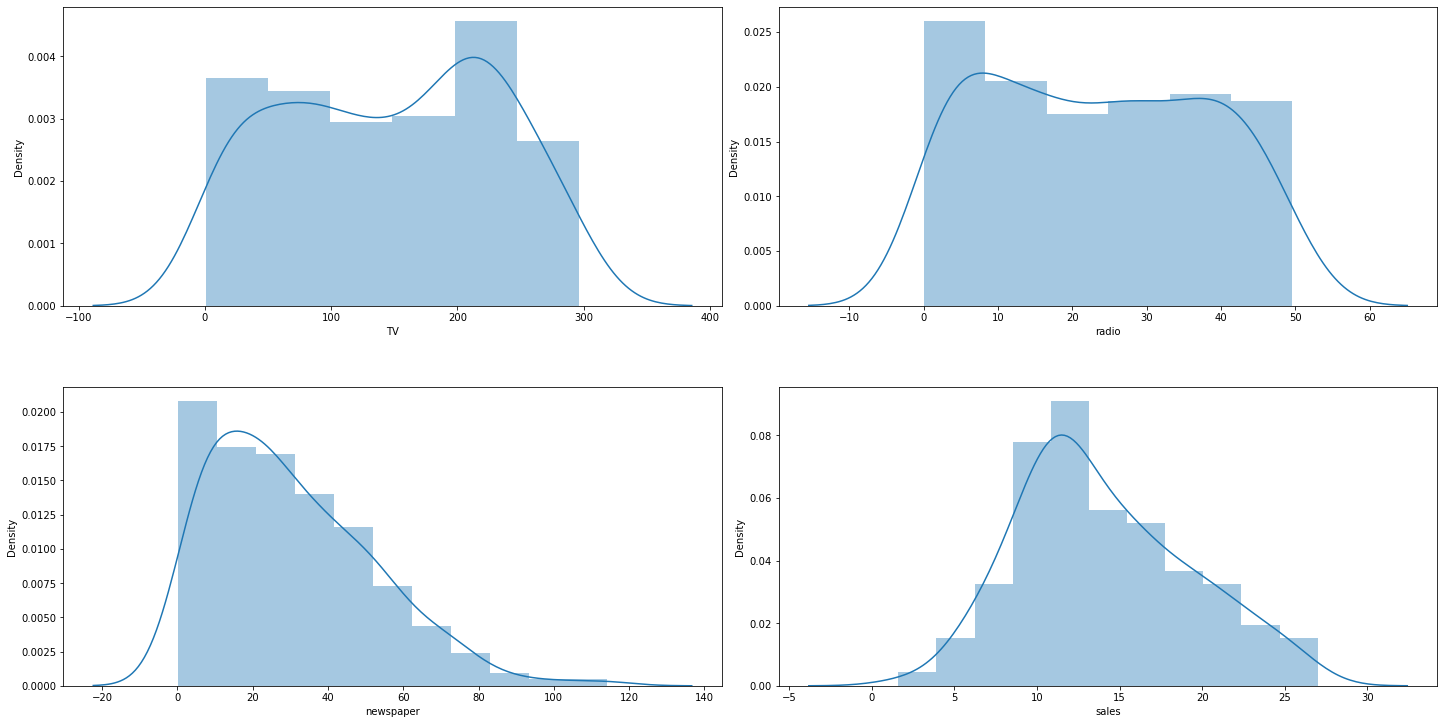

In [12]:
#create dist plot
fig, ax=plt.subplots(ncols=2,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.distplot(value,ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

We can see that there might be some skewness present in all the features

In [13]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

News paper has got some skewness and need to be removed

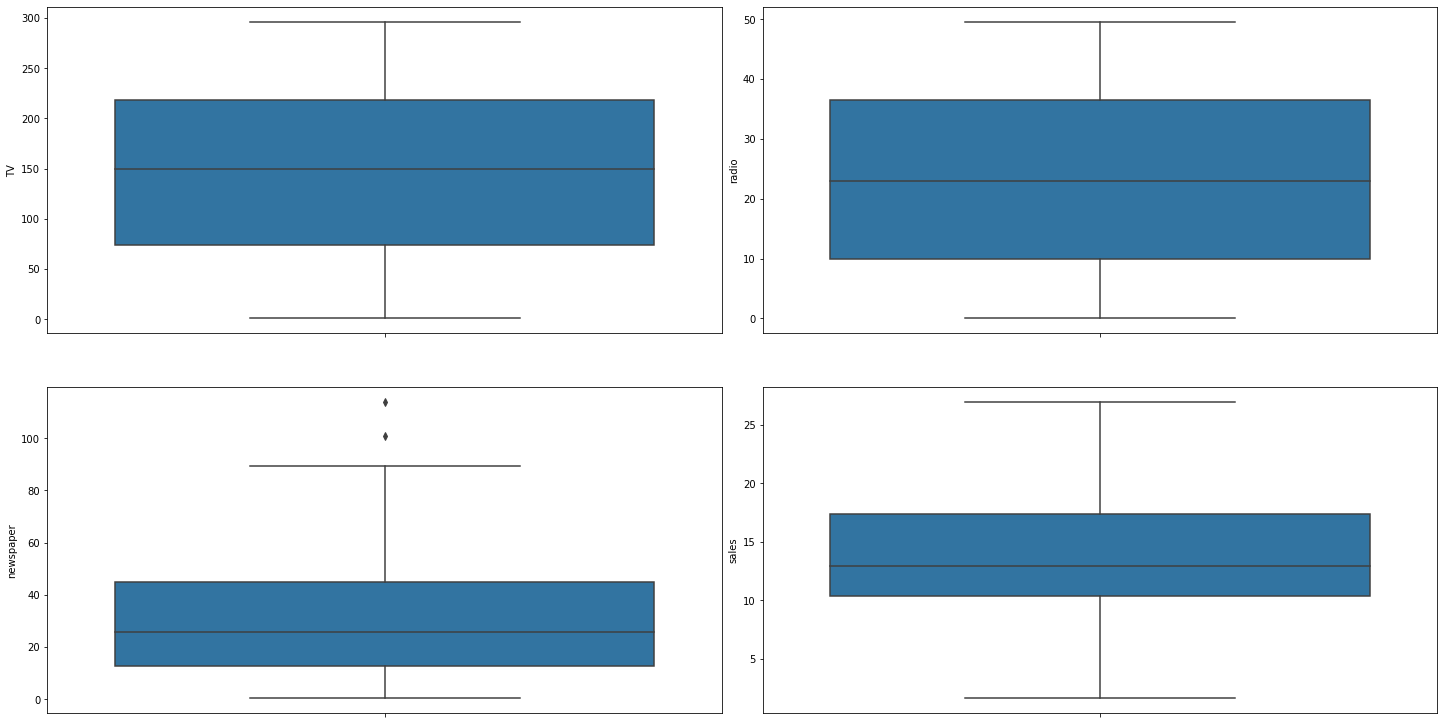

In [14]:
#create box plot
fig, ax=plt.subplots(ncols=2,nrows=2,figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
        sns.boxplot(y=col, data=df, ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

there are some outliers in the newspaper and need to be removed

# Bivariate Analysis

<AxesSubplot:xlabel='TV', ylabel='sales'>

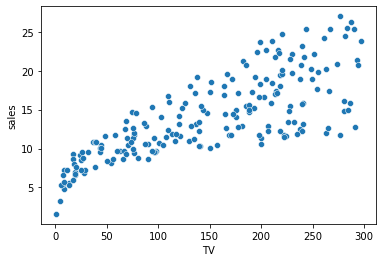

In [16]:
### Checking  Tv feature relationship with label sales:
sns.scatterplot(x=sales_df['TV'],y=sales_df['sales'],data =df)

As we can see there is a positive relationship between TV and sales,if we spend more on TV advertising ,sales increases.

<AxesSubplot:xlabel='radio', ylabel='sales'>

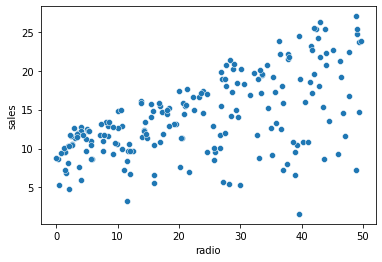

In [17]:
### Checking  radio feature relationship with label sales:
sns.scatterplot(x=sales_df['radio'],y=sales_df['sales'],data =df)

As we can see there is a positive relationship between radio and sales,if we spend more on radio advertising ,sales increases.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

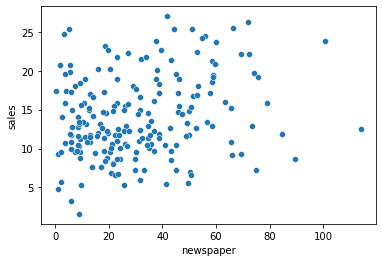

In [18]:
### Checking  newspaper feature relationship with label sales:
sns.scatterplot(x=sales_df['newspaper'],y=sales_df['sales'],data =sales_df)

As we can see there is not any sprcific relationship between newspaper and sales.

<AxesSubplot:>

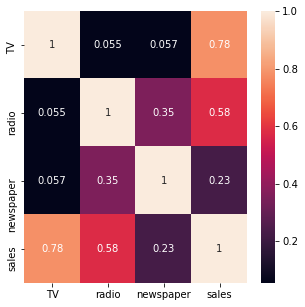

In [19]:
###Checking Correlation:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot =True)

As from above heatmap,we can see TV and radio correlation with sales is more than 50% where as newspaper has very weak relationship with sales.

# Removing Skewness

In [21]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

we can try to remove skewness from newspapaer

In [25]:
df['newspaper']=power_transform(df['newspaper'].values.reshape(-1,1))

In [26]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.077942
sales        0.407571
dtype: float64

# Removing outliers

In [30]:
z=np.abs(zscore(df))

In [34]:
df_new=df[(z>3).all(axis=1)]

In [35]:
df_new.shape

(0, 4)

In [33]:
df.shape

(200, 4)

looks like all the data having z<3.So no need to remove outliers

# Splitting Data

In [36]:
x = df.drop('sales',axis=1)
y = df['sales']

# Scaling

In [37]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)


# Train test splitting and model training

In [39]:
#splitting the dataframe
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(pred_train,y_train)*100,1)==round(r2_score(pred_test,y_test)*100,1):
        print('At random state',i,'the model performs verywell')
        print('At random state',i)
        print("the training accuacy is",r2_score(pred_train,y_train)*100)
        print("the testing accuacy is",r2_score(pred_test,y_test)*100)

At random state 55 the model performs verywell
At random state 55
the training accuacy is 88.19150355529123
the testing accuacy is 88.20541507178528
At random state 356 the model performs verywell
At random state 356
the training accuacy is 88.39203055106812
the testing accuacy is 88.44963850165442
At random state 477 the model performs verywell
At random state 477
the training accuacy is 88.22990853086633
the testing accuacy is 88.20079683950499
At random state 533 the model performs verywell
At random state 533
the training accuacy is 88.30823946603647
the testing accuacy is 88.29600936513802
At random state 542 the model performs verywell
At random state 542
the training accuacy is 88.10663757031058
the testing accuacy is 88.06405731603519
At random state 746 the model performs verywell
At random state 746
the training accuacy is 88.68746573236295
the testing accuacy is 88.7088083126003
At random state 961 the model performs verywell
At random state 961
the training accuacy is 88.38

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.2,random_state=746)

# Linear Regression

In [44]:
### Creating train test split:-

lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.8783314913701269

# Random Forest Regressor

In [45]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.977014642171874

# KNeighborsRegressor

In [46]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test = knr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.9168344429844575

# DecisionTreeRegressor

In [47]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test = dtr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.9411866577967881

# Ridge Regression

In [48]:
rd = Ridge()
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

acc = r2_score(y_test,predict_rd)
acc

0.8795807306636676

# Cross Validation

In [49]:
cvs1= cross_val_score(lr,x_scaler,y,cv=5)
print("Cross Validation of Linear Regression model ",cvs1.mean())

Cross Validation of Linear Regression model  0.8873927517379308


In [50]:
cvs2= cross_val_score(rf,x_scaler,y,cv=5)
print("Cross Validation of RandomForest Regression model ",cvs2.mean())

Cross Validation of RandomForest Regression model  0.9752051740171357


In [51]:
cvs3= cross_val_score(knr,x_scaler,y,cv=5)
print("Cross Validation of KNeighbors Regression model ",cvs3.mean())

Cross Validation of KNeighbors Regression model  0.9349586682110838


In [52]:
cvs4= cross_val_score(dtr,x_scaler,y,cv=5)
print("Cross Validation of DecisionTree Regression model ",cvs4.mean())

Cross Validation of DecisionTree Regression model  0.9504365509687158


In [53]:
cvs5= cross_val_score(rd,x_scaler,y,cv=5)
print("Cross Validation of Ridge Regression model ",cvs5.mean())

Cross Validation of Ridge Regression model  0.887451704431979


Random forest classifier is having highest cross validation score

# Hyper Parameter Tuning

In [54]:
param_grid={'bootstrap': [True, False],
               
               'max_features': ['auto','sqrt','log2'],
               'min_samples_leaf': [1, 2],
               'max_samples': [0.5,0.75,1],
               'n_estimators': [200, 500,600],
                'max_depth':[30, 40, 50],'min_samples_split': [2, 5, 10]}

In [56]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=5,n_jobs=-1)

In [57]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [0.5, 0.75, 1],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 500, 600]},
             verbose=5)

In [58]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'max_samples': 0.75,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 600}

In [59]:
pred_y=rf_grid.best_estimator_.predict(x_test)

In [61]:
r2_score(y_test,pred_y)

0.9759988558345418

there is very little improvement with hyper parameter tuning

# Model Saving

In [64]:
filename = 'sales_prediction.pickle'
pickle.dump(rf,open(filename,'wb'))